In [1]:
import xarray as xr
import torch
import numpy as np
import os
import json
import copy
import numpy as np
import shutil
from scipy.io import netcdf


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid

import climate_train as ct
import climate_data
import climate_models
import climate_job_maintenance as cjm

In [2]:
args=ct.options(string_input="-b 3".split())

offset=3000
args.model_id=offset
args.model_bank_id="G"
root='/scratch/cg3306/climate/runs/'
C,names=climate_models.golden_model_bank(args,only_description=True,verbose=True)

root improvement 3000
	temp
		no - yes - 
	global
		no - yes - 
	res
		no - yes - 
	geophys
		no - yes - 
	sigma
		4 - 8 - 12 - 16 - 


In [3]:
ls /scratch/cg3306/climate/runs/G-3000

MSE-co2.npy  MSE.npy  SC2-co2.npy  SC2.npy  best-model  last-model  log.json


In [4]:
root='/scratch/cg3306/climate/runs/G-'

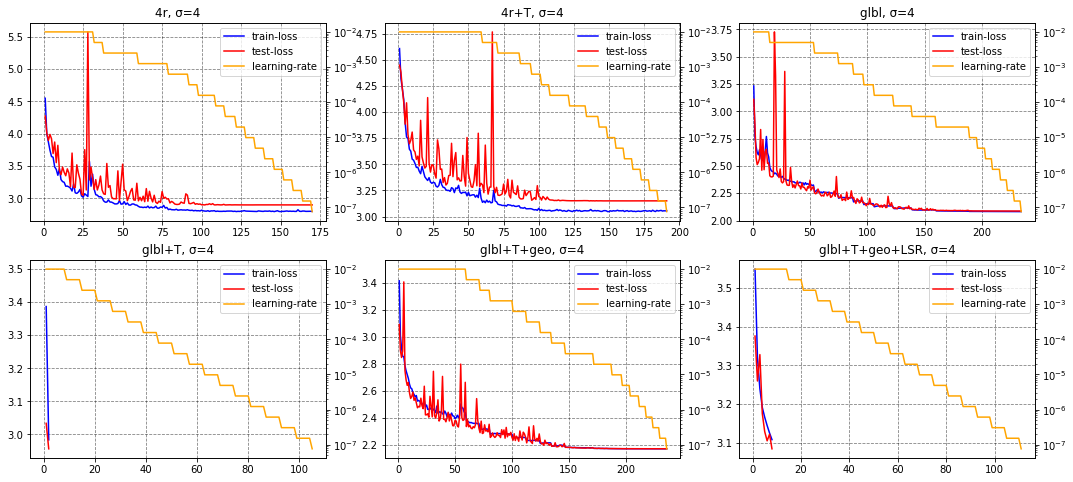

In [5]:
ncols=3
nrows=2
fig,axs=plt.subplots(nrows,ncols,figsize=(18,8))
fig.patch.set_facecolor('white')

sigmas=[4,8,12,16]

s=0

x=[[0,1],[0,1],[0],[0],[s]]
J=cjm.jobnums(C=C,x=x,offset=offset)

#testing res
x=[[1],[1],[0,1],[1],[s]]
J+=cjm.jobnums(C=C,x=x,offset=offset)

titles=['4r','4r+T','glbl','glbl+T','glbl+T+geo','glbl+T+geo+LSR']
titles=[tt+', \u03C3='+str(sigmas[s]) for tt in titles]


for i in range(np.minimum(ncols*nrows,len(J))):
    ir=i//ncols
    ic=i%ncols
    
    f = open(root+str(J[i])+'/log.json',)
    logs = json.load(f)
    
    trainloss=np.array([np.mean(a) for a in logs['train-loss']])
    testloss=np.array(logs['test-loss'])
    lr=np.array(logs['lr'])
    epochs=np.array(logs['epoch'])
    
    ax1=axs[ir,ic]
    ax1.plot(epochs,trainloss, color='blue',label='train-loss')
    ax1.plot(epochs,testloss, color='red',label='test-loss')
    ax1.plot([0],[3.5], color='orange',label='learning-rate')
    ax2 = ax1.twinx()
    ax2.semilogy(epochs,lr, color='orange',label='learning-rate')
    
    ax1.legend()
    ax1.grid(color='k',linestyle='--',alpha=0.5)
    ax1.set_title(titles[i])

In [6]:
args=ct.options(string_input="-b 3".split())

offset=9000
args.model_id=offset
args.model_bank_id="G"
root='/scratch/cg3306/climate/runs/'
C,names=climate_models.golden_model_bank(args,only_description=True,verbose=True)

0 [4, 8, 12, 16]
root improvement 9000
	temp
		no - yes - 
	global
		no - yes - 
	res
		no - yes - 
	geophys
		no - yes - 
	sigma
		4 - 8 - 12 - 16 - 
	widths
		0 - 1 - 2 - 


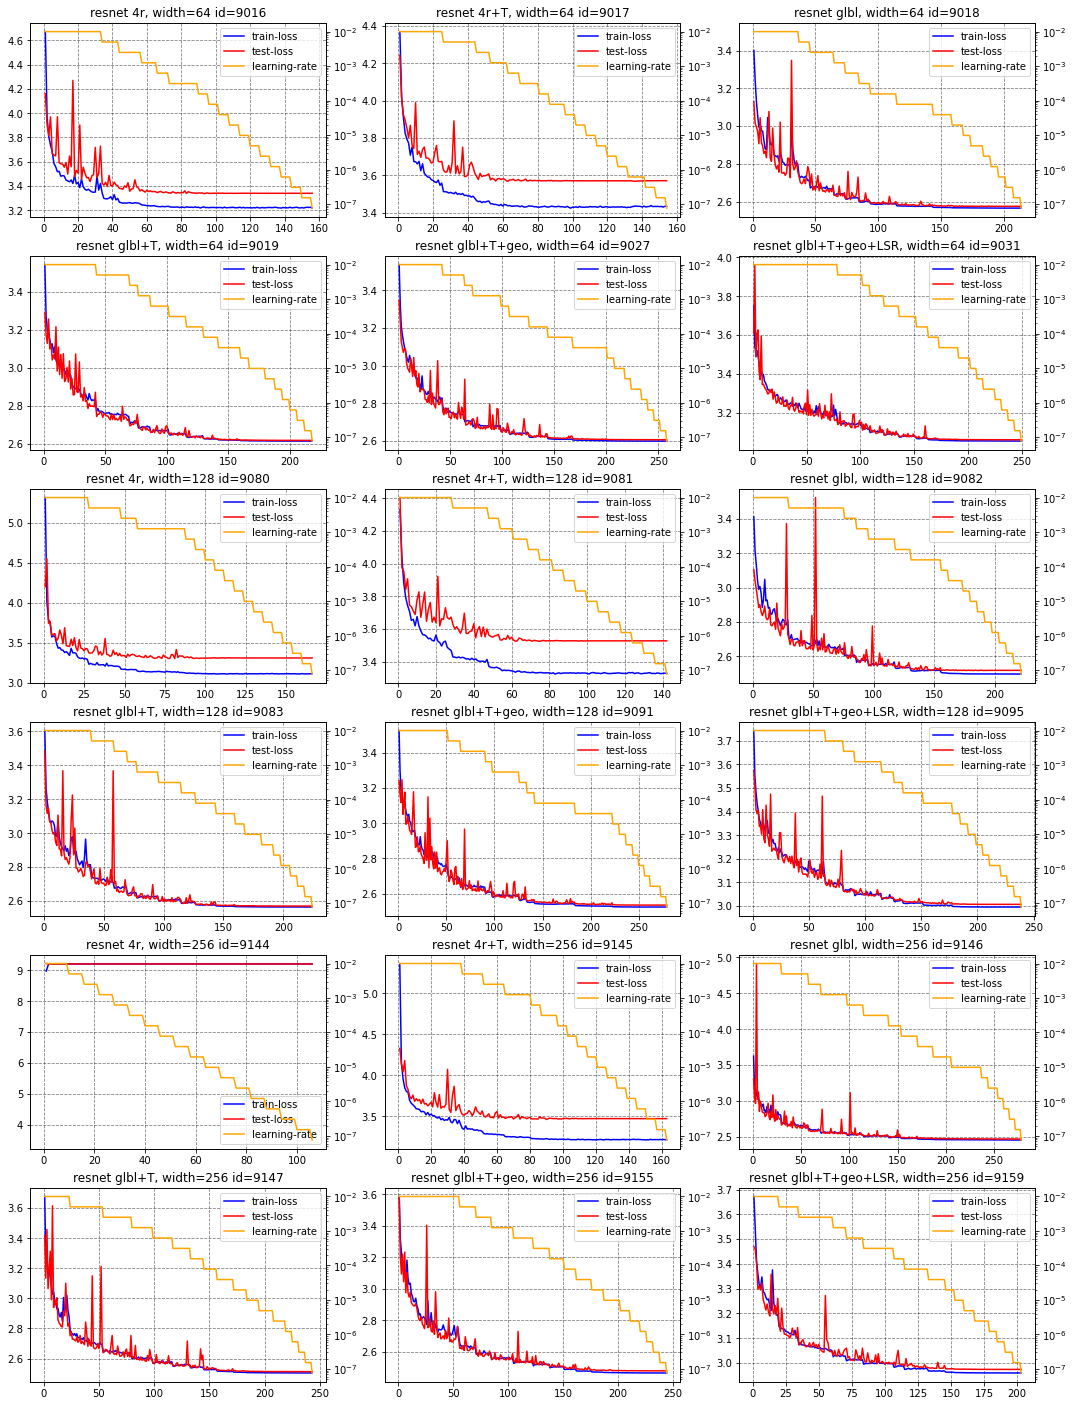

In [90]:
sigmas=[4,8,12,16]

J=[]
for iw in range(3):
    x=[[0,1],[0,1],[0],[0],[1],[iw]]
    J+=cjm.jobnums(C=C,x=x,offset=offset)

    x=[[1],[1],[0,1],[1],[1],[iw]]
    J+=cjm.jobnums(C=C,x=x,offset=offset)

ncols=3
nrows=len(J)//ncols
fig,axs=plt.subplots(nrows,ncols,figsize=(18,25))
fig.patch.set_facecolor('white')

widths=[64,128,256]





for i in range(np.minimum(ncols*nrows,len(J))):
    ir=i//ncols
    ic=i%ncols
    
    iw=i//6
    titles=['4r','4r+T','glbl','glbl+T','glbl+T+geo','glbl+T+geo+LSR']
    titles=['resnet '+tt+', width='+str(widths[iw]) for tt in titles]

    f = open(root+'G-'+str(J[i])+'/log.json',)
    logs = json.load(f)
    
    trainloss=np.array([np.mean(a) for a in logs['train-loss']])
    testloss=np.array(logs['test-loss'])
    lr=np.array(logs['lr'])
    epochs=np.array(logs['epoch'])
    
    ax1=axs[ir,ic]
    ax1.plot(epochs,trainloss, color='blue',label='train-loss')
    ax1.plot(epochs,testloss, color='red',label='test-loss')
    ax1.plot([0],[3.5], color='orange',label='learning-rate')
    ax2 = ax1.twinx()
    ax2.semilogy(epochs,lr, color='orange',label='learning-rate')
    
    ax1.legend()
    ax1.grid(color='k',linestyle='--',alpha=0.5)
    ax1.set_title(titles[i%len(titles)]+' id='+str(J[i]))